In [104]:

from collections import Counter
from typing import Union, Tuple
from pathlib import Path
import shutil
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as po


from ipywidgets import IntSlider, interact
%matplotlib inline

In [105]:
# data paths
data_path = Path('../data/')
processed_path = data_path.joinpath('processed')
cmu_path = data_path.joinpath('raw/MovieSummaries/')
cpi_path = data_path.joinpath('CPIAUCNS.csv')


In [106]:
# processed data
processed_chars_path = processed_path.joinpath('cmu_characters.csv')
proc_chars = pd.read_csv(processed_chars_path)
proc_chars

,Unnamed: 0,Character type,char,movie,id,actor
0,0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader
...,...,...,...,...,...,...
496,496,young_gun,Morgan Earp,Tombstone,/m/0k776f,Bill Paxton
497,497,young_gun,Colorado Ryan,Rio Bravo,/m/0k2kqg,Ricky Nelson
498,498,young_gun,Tom Sawyer,The League of Extraordinary Gentlemen,/m/0k5nsh,Shane West
499,499,young_gun,William H. 'Billy the Kid' Bonney,Young Guns II,/m/03lrjk0,Emilio Estevez


In [107]:
raw_characters = cmu_path.joinpath('character.metadata.tsv')
character_header = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie release date",
    "Character name",
    "Actor date of birth",
    "Actor gender",
    "Actor height (in meters)",
    "Actor ethnicity (Freebase ID)",
    "Actor name",
    "Actor age at movie release",
    "Freebase character/actor map ID",
    "Freebase character ID",
    "Freebase actor ID"
]
raw_characters = pd.read_csv(raw_characters, sep='\t', names=character_header,)
raw_characters

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [108]:
meta_data = pd.read_csv(cmu_path.joinpath('movie.metadata.tsv'), sep='\t', 
                        names=['Wikipedia Movie ID', 'Freebase Movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres'])

In [109]:

meta_data = meta_data.sort_values('Movie box office revenue', ascending=False)
df_revenue = meta_data[['Freebase Movie ID', 'Movie box office revenue']]
df_revenue.head(10)

,Freebase Movie ID,Movie box office revenue
23702,/m/0bth54,2.782275e+09
22256,/m/0dr_4,2.185372e+09
28192,/m/062zm5h,1.511758e+09
30278,/m/0gvsynb,1.328111e+09
18645,/m/0872p_c,1.123747e+09
80920,/m/017jd9,1.119930e+09
54719,/m/0bpm4yw,1.078009e+09
69586,/m/04hwbq,1.063172e+09
14303,/m/09v8clw,1.043872e+09
50039,/m/0ddt_,1.027045e+09


In [110]:
# read wikidata ids
pd.read_csv(processed_path.joinpath('wikipedia_ids.csv'))

,Unnamed: 0,Wikidata URI,Wikidata ID,IMDb ID
0,/m/03vyhn,http://www.wikidata.org/entity/Q261700,Q261700,tt0228333
1,/m/08yl5d,http://www.wikidata.org/entity/Q16250726,Q16250726,tt0245916
2,/m/0crgdbh,http://www.wikidata.org/entity/Q4978832,Q4978832,tt0094806
3,/m/0285_cd,http://www.wikidata.org/entity/Q7995657,Q7995657,tt0094320
4,/m/01mrr1,http://www.wikidata.org/entity/Q869644,Q869644,tt0083949
...,...,...,...,...
75188,/m/0j7hxnt,http://www.wikidata.org/entity/Q6819873,Q6819873,tt1816585
75189,/m/0g4pl34,http://www.wikidata.org/entity/Q12125420,Q12125420,tt1606259
75190,/m/02pygw1,http://www.wikidata.org/entity/Q4770308,Q4770308,tt0362411
75191,/m/03pcrp,http://www.wikidata.org/entity/Q2663931,Q2663931,tt0113726


In [111]:
# map freebase id to wikidata id
wikipedia_ids = pd.read_csv(processed_path.joinpath('wikipedia_ids.csv'), names=['freebase_id', 'ignore', 'movie_id', 'imdb_id'])
wikipedia_ids.head()
free_wiki_map = wikipedia_ids[['freebase_id', 'movie_id']].loc[1:]
freebase_revenue = df_revenue.join(free_wiki_map.set_index('freebase_id'), on='Freebase Movie ID')

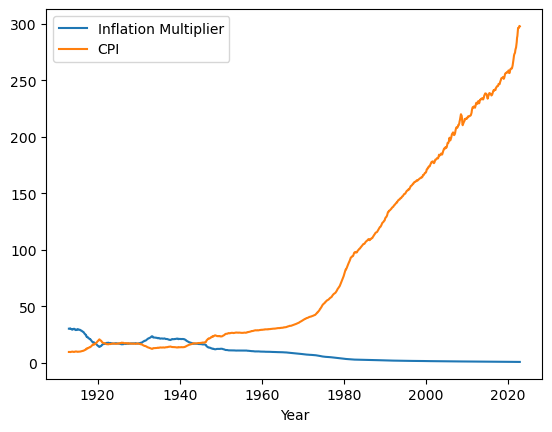

In [112]:
# load inflation data
inflation = pd.read_csv(cpi_path, names=['date', 'cpi'], skiprows=1)
inflation['date'] = pd.to_datetime(inflation['date'])
# calculate inflation multiplier
inflation['multiplier'] = inflation['cpi'].iloc[-1] / inflation['cpi']
plt.plot(inflation['date'], inflation['multiplier'], label='Inflation Multiplier')
plt.plot(inflation['date'], inflation['cpi'], label='CPI')
plt.xlabel('Year')
plt.legend()

In [113]:
# generate plotly figure
p = px.line(inflation, x='date', y='cpi')
p.update_layout(
    title='<b>Consumer Price Index for All Urban Consumers</b> over time<br><sup>Source: Federal Reserve Economic Data</sup>',
    yaxis_title='CPI',
    xaxis_title='Year',
    width=800,
    height=500,
    )
p.show()
# po.plot(p, filename='cpi.html')

In [114]:
# calculate mean of inflation multiplier per year
multiplier_year = inflation.groupby(inflation['date'].dt.year).mean()
multiplier_year = multiplier_year
multiplier_year

,cpi,multiplier
date,,
1913,9.883333,30.126541
1914,10.016667,29.726907
1915,10.108333,29.455613
1916,10.883333,27.389927
1917,12.825000,23.269261
...,...,...
2018,251.106833,1.185637
2019,255.657417,1.164546
2020,258.811167,1.150337


In [115]:
# filter nan data from raw characters
raw_characters = raw_characters.dropna()
print(raw_characters.shape)
# process age data, make sure age is greater than 0
raw_characters = raw_characters[raw_characters['Actor age at movie release'] > 0]
print('After filtering age data', raw_characters.shape)

(45264, 13)
After filtering age data (45239, 13)


In [116]:
raw_characters

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
56,2314463,/m/0734w5,2006,Taper Guy,1971-05-26,M,1.870,/m/033tf_,Matt Stone,34.0,/m/0cgn0lx,/m/0h0z488,/m/01_x6d
76,612710,/m/02wjqm,1999-10-01,Sandii,1975-09-20,F,1.680,/m/0222qb,Asia Argento,24.0,/m/02vcxk_,/m/0h2l6rx,/m/028pzq
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450565,22330502,/m/05sync6,1931-01-31,Yvonne Valbret,1905-09-18,F,1.702,/m/06mvq,Greta Garbo,25.0,/m/05tg4vb,/m/0h2ppfw,/m/0h14h
450585,24997872,/m/09g6klx,2010-05-07,Raja,1951-09-07,M,1.780,/m/04mvp8,Mammootty,58.0,/m/0gvytkx,/m/0h27wx_,/m/02hkv5
450586,24997872,/m/09g6klx,2010-05-07,Surya,1982-10-16,M,1.810,/m/0dryh9k,Prithviraj Sukumaran,27.0,/m/0gw0rm2,/m/0gz549m,/m/0cqcgj
450587,24997872,/m/09g6klx,2010-05-07,Aswathy,1982-09-11,F,1.680,/m/0dryh9k,Shriya Saran,27.0,/m/0gw423l,/m/0gyf84q,/m/09r_wb


In [117]:
# load extended wikidata
ext_chars = processed_path.joinpath('chars_extended.csv')
ext_chars = pd.read_csv(ext_chars)
print(ext_chars.columns)

Index(['movie_id', 'movie_name', 'movie_genre', 'movie_origin',
       'movie_release', 'box_office_value', 'director_id', 'director_name',
       'director_gender', 'director_country', 'director_birth',
       'director_age_at_release', 'producer_id', 'producer_name',
       'producer_gender', 'producer_country', 'producer_birth',
       'producer_age_at_release', 'cast_id_0', 'cast_0_name', 'cast_0_gender',
       'cast_0_country', 'cast_0_birth', 'cast_0_age_at_release', 'cast_id_1',
       'cast_1_name', 'cast_1_gender', 'cast_1_country', 'cast_1_birth',
       'cast_1_age_at_release', 'cast_id_2', 'cast_2_name', 'cast_2_gender',
       'cast_2_country', 'cast_2_birth', 'cast_2_age_at_release', 'cast_id_3',
       'cast_3_name', 'cast_3_gender', 'cast_3_country', 'cast_3_birth',
       'cast_3_age_at_release', 'cast_id_4', 'cast_4_name', 'cast_4_gender',
       'cast_4_country', 'cast_4_birth', 'cast_4_age_at_release'],
      dtype='object')


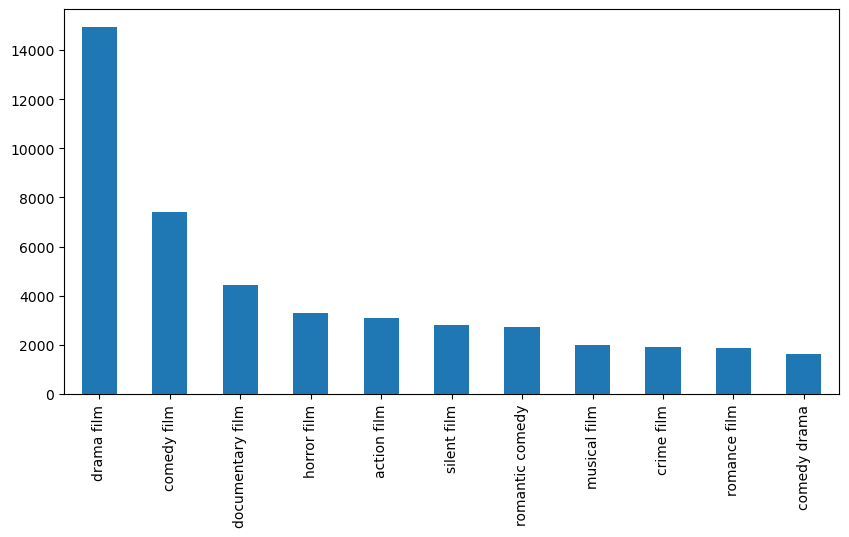

In [118]:
top = 10
ext_chars['movie_genre'].value_counts()[:top+1].plot(kind='bar', figsize=(10, 5))
# create a map from genre to number of movies
genre_map = ext_chars['movie_genre'].value_counts()[:top+1].to_dict()

In [119]:
ext_chars['movie_genre'].isna().sum()

9437

In [120]:
# keys to study in the analysis
study_keys = [
    'movie_id', 
    'cast_0_age_at_release',
    'cast_1_age_at_release',
    'cast_2_age_at_release',
    'cast_3_age_at_release',
    'cast_4_age_at_release',
    'movie_release',
    'movie_genre',
]

# create a dataframe with these keys

analysis_df = ext_chars[study_keys]

# join with revenue
analysis_df = analysis_df.join(freebase_revenue.set_index('movie_id'), on='movie_id')

# drop nan values
analysis_df = analysis_df.dropna()
# convert release date to year
analysis_df['movie_release_year'] = pd.to_datetime(analysis_df['movie_release']).dt.year

# drop abnormal values
analysis_df = analysis_df[~(analysis_df[['cast_0_age_at_release', 'cast_1_age_at_release', 'cast_2_age_at_release', 'cast_3_age_at_release', 'cast_4_age_at_release']] < 0).any(axis=1)]
analysis_df = analysis_df[~(analysis_df[['cast_0_age_at_release', 'cast_1_age_at_release', 'cast_2_age_at_release', 'cast_3_age_at_release', 'cast_4_age_at_release']] > 100).any(axis=1)]

# filter out top k genres
analysis_df = analysis_df[analysis_df['movie_genre'].isin(analysis_df['movie_genre'].value_counts()[:top].index)]
analysis_df['num_movies_in_this_genre'] = analysis_df['movie_genre'].map(analysis_df['movie_genre'].value_counts())

In [121]:
analysis_df['mean_cast_age'] = analysis_df[['cast_0_age_at_release', 'cast_1_age_at_release', 'cast_2_age_at_release', 'cast_3_age_at_release', 'cast_4_age_at_release']].mean(axis=1)
analysis_df['diff_cast_age'] = analysis_df[['cast_0_age_at_release', 'cast_1_age_at_release', 'cast_2_age_at_release', 'cast_3_age_at_release', 'cast_4_age_at_release']].max(axis=1) \
    - analysis_df[['cast_0_age_at_release', 'cast_1_age_at_release', 'cast_2_age_at_release', 'cast_3_age_at_release', 'cast_4_age_at_release']].min(axis=1)
analysis_df = analysis_df.sort_values(by='movie_release_year')

analysis_df['movie_box_office_revenue'] = analysis_df['Movie box office revenue'].astype(float)
analysis_df.drop(columns=['Movie box office revenue'], inplace=True)

In [122]:
# calibrate revenue with inflation
print('Before calibration', analysis_df.shape)
analysis_df = pd.merge(analysis_df, multiplier_year, left_on='movie_release_year', right_on='date', how='left')
print('After calibration', analysis_df.shape)


Before calibration (4714, 14)
After calibration (4714, 16)


In [146]:
analysis_df.head()

,movie_id,cast_0_age_at_release,cast_1_age_at_release,cast_2_age_at_release,cast_3_age_at_release,cast_4_age_at_release,movie_release,movie_genre,Freebase Movie ID,movie_release_year,num_movies_in_this_genre,mean_cast_age,diff_cast_age,movie_box_office_revenue,cpi,multiplier
0,Q220394,22.0,21.0,24.0,37.0,43.0,1915-01-01,drama film,/m/0151l,1915,1068,29.4,22.0,50000000.0,10.108333,29.455613
1,Q1187189,27.0,25.0,35.0,58.0,60.0,1920-01-01,romance film,/m/0c5ppr,1920,289,41.0,35.0,4500000.0,20.041667,14.864445
2,Q374172,26.0,7.0,32.0,53.0,13.0,1921-01-01,comedy drama,/m/04vl27,1921,267,26.2,46.0,2500000.0,17.850000,16.690249
3,Q2408008,29.0,51.0,43.0,13.0,33.0,1921-01-01,drama film,/m/05b_29y,1921,1068,33.8,38.0,900000.0,17.850000,16.690249
4,Q1219825,55.0,30.0,26.0,36.0,22.0,1921-01-01,romance film,/m/06pkq3,1921,289,33.8,33.0,4500000.0,17.850000,16.690249


Text(0, 0.5, 'Revenue')

/Users/chengkunli/miniconda3/envs/ada/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



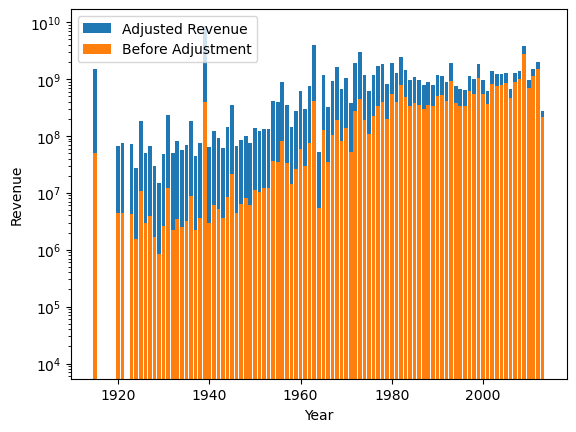

In [153]:
analysis_df['movie_box_office_revenue_adj'] = analysis_df['movie_box_office_revenue'] * analysis_df['multiplier']
plt.bar(analysis_df['movie_release_year'], analysis_df['movie_box_office_revenue_adj'], label='Adjusted Revenue')
plt.bar(analysis_df['movie_release_year'], analysis_df['movie_box_office_revenue'], label='Before Adjustment')
plt.legend()
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Revenue')

In [154]:
inflation.columns

Index(['date', 'cpi', 'multiplier'], dtype='object')

<AxesSubplot:xlabel='diff_cast_age', ylabel='Count'>

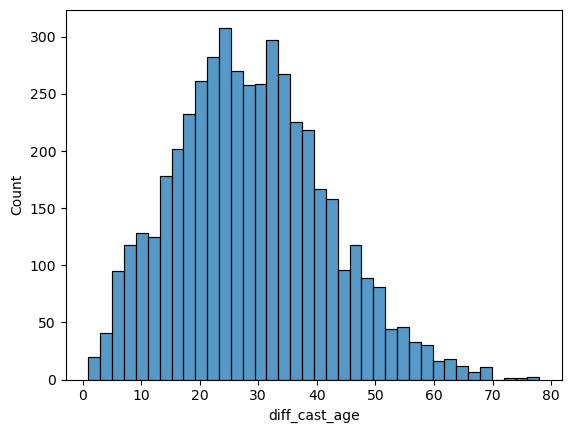

In [155]:
sns.histplot(data=analysis_df, x='diff_cast_age', discrete=False)

<AxesSubplot:xlabel='mean_cast_age', ylabel='Count'>

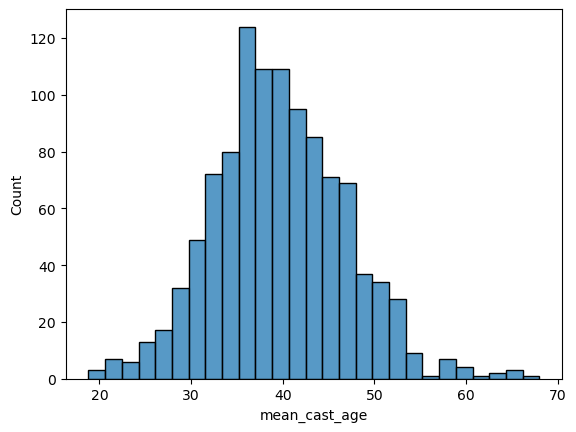

In [156]:
sns.histplot(data=analysis_df.query('movie_genre=="drama film"'), x='mean_cast_age', discrete=False)

<AxesSubplot:xlabel='mean_cast_age', ylabel='Count'>

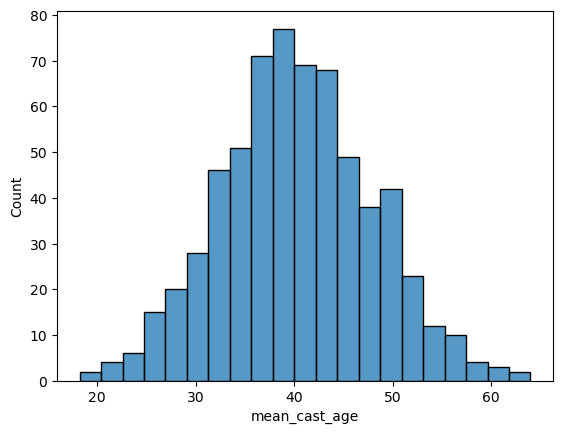

In [157]:
sns.histplot(data=analysis_df.query('movie_genre=="comedy film"'), x='mean_cast_age', discrete=False)

<AxesSubplot:xlabel='mean_cast_age', ylabel='Count'>

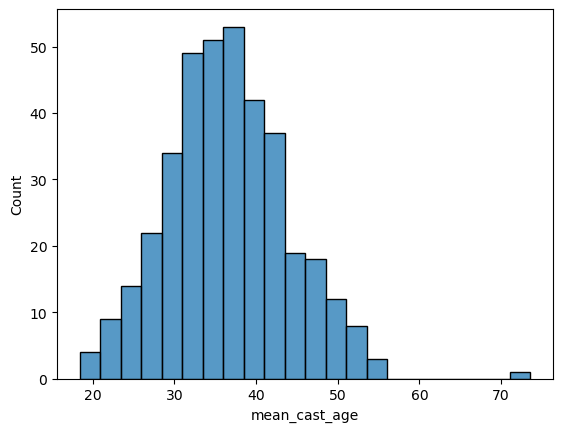

In [158]:
sns.histplot(data=analysis_df.query('movie_genre=="horror film"'), x='mean_cast_age', discrete=False)

In [159]:
p = px.histogram(
    analysis_df, x='mean_cast_age', animation_frame='movie_genre', range_x=[0, 100],
    color='movie_genre', range_y=[0, 110]
    )
p.update_layout(
    title='Mean Cast Age Distribution by Genre',
    xaxis_title='Mean Cast Age',
    yaxis_title='Counts',
    legend_title='Genre',
)
p.show()

In [133]:
# calculate the numeber of movies in each genre per year
num_movies_per_genre_per_year = analysis_df.groupby(['movie_release_year', 'movie_genre']).size().reset_index(name='num_movies')


In [239]:
number_of_years = len(analysis_df['movie_release_year'].unique())
# create a dataframe with genres as headers and years as index
genre_revenue = pd.DataFrame(index=analysis_df['movie_release_year'].unique(), columns=analysis_df['movie_genre'].unique())
# fill in the dataframe
for year in genre_revenue.index:
    for genre in genre_revenue.columns:
        genre_revenue.loc[year, genre] = analysis_df.query('movie_release_year == @year and movie_genre == @genre')['movie_box_office_revenue_adj'].sum()
genre_revenue.head()

,drama film,romance film,comedy drama,romantic comedy,comedy film,horror film,crime film,biographical film,action film,science fiction film
1915,1472780633.708431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1920,0.0,66890002.86297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1921,15021224.047739,75106120.238696,41725622.354831,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1923,72801283.572776,61121930.465366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1924,15122191.811769,0.0,0.0,26947194.451589,0.0,0.0,0.0,0.0,0.0,0.0


In [312]:
# create a dataframe with genres as headers and years as index and diff_cast_age as values
genre_diff_age = pd.DataFrame(index=analysis_df['movie_release_year'].unique(), columns=analysis_df['movie_genre'].unique())
# fill in the dataframe
for year in genre_diff_age.index:
    for genre in genre_diff_age.columns:
        genre_diff_age.loc[year, genre] = analysis_df.query('movie_release_year == @year and movie_genre == @genre')['diff_cast_age'].mean()
genre_diff_age.head()

,drama film,romance film,comedy drama,romantic comedy,comedy film,horror film,crime film,biographical film,action film,science fiction film
1915,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921,38.0,33.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923,33.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1924,36.5,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN


In [313]:
# group every 15 years in the genre_revenue dataframe
genre_revenue_15 = genre_revenue.groupby(np.arange(len(genre_revenue))//15).mean().set_index(genre_revenue.index[::15])
genre_revenue_15

,drama film,romance film,comedy drama,romantic comedy,comedy film,horror film,crime film,biographical film,action film,science fiction film
1915,1.536368e+08,1.968935e+07,7.155420e+06,3.078610e+07,3.748145e+06,1.857873e+07,5.940076e+05,6.298363e+06,0.000000e+00,0.000000e+00
1935,1.198220e+08,6.170741e+08,4.791071e+06,8.501450e+07,3.241388e+07,7.242221e+06,2.171729e+07,1.690185e+07,1.297272e+06,0.000000e+00
1950,6.045324e+08,6.005839e+07,2.841254e+08,2.223711e+08,1.140820e+08,1.843797e+07,8.694165e+07,1.364873e+08,5.765343e+07,4.682784e+07
1965,8.504371e+08,2.332578e+08,3.038786e+08,5.286361e+08,3.242069e+08,5.439853e+08,2.144229e+08,1.256301e+08,7.685618e+08,2.305571e+08
1980,7.973964e+08,5.165721e+08,2.937107e+08,9.988039e+08,1.011157e+09,4.064596e+08,6.354685e+08,2.235159e+08,1.888327e+09,9.180738e+08
1995,1.252043e+09,8.195891e+08,2.922796e+08,2.701577e+09,1.717412e+09,1.119027e+09,6.858929e+08,5.217838e+08,3.634725e+09,1.547114e+09
2010,8.739624e+08,6.949170e+08,4.055264e+08,1.566760e+09,1.413727e+09,7.492931e+08,3.838291e+08,3.676624e+08,3.438385e+09,1.261636e+09


In [314]:
# group every 20 years in the genre_diff_age dataframe
genre_diff_age_15 = genre_diff_age.groupby(np.arange(len(genre_diff_age))//15).mean().set_index(genre_diff_age.index[::15])
genre_diff_age_15

,drama film,romance film,comedy drama,romantic comedy,comedy film,horror film,crime film,biographical film,action film,science fiction film
1915,30.821429,33.000000,36.250000,30.214286,28.000000,26.666667,28.000000,36.500000,NaN,NaN
1935,29.480159,33.265152,29.500000,31.887179,32.566667,34.333333,24.523810,29.083333,47.000000,NaN
1950,27.039967,28.413333,28.309524,31.321374,30.466931,26.166667,27.033333,26.958333,33.222222,32.148148
1965,26.494444,25.687500,27.895833,25.844048,26.614286,33.533333,20.222222,22.950000,26.922527,30.888889
1980,29.556438,31.750556,32.070134,28.723052,29.606458,32.198937,28.280897,30.443333,27.241746,31.029630
1995,31.844472,28.555309,31.322194,25.247637,29.335044,27.841002,28.506716,28.470706,27.255107,30.640378
2010,32.637717,35.153846,35.238889,24.721496,27.609428,32.200758,26.311111,28.478535,26.457086,27.861111


In [315]:
genre_diff_age

,drama film,romance film,comedy drama,romantic comedy,comedy film,horror film,crime film,biographical film,action film,science fiction film
1915,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921,38.0,33.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923,33.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1924,36.5,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2009,33.948718,32.545455,29.5,28.064516,26.047619,30.36,24.444444,28.75,24.92,26.545455
2010,34.086957,33.461538,36.416667,25.37037,27.272727,38.0,29.333333,27.727273,27.681818,25.5
2011,31.72093,28.0,41.3,23.5,29.888889,31.636364,25.2,33.375,26.26087,33.833333
2012,32.105263,44.0,28.0,25.294118,25.666667,25.166667,24.4,24.333333,25.428571,24.25


In [326]:
# create a dataframe with years as index and genres revenue diff_cast_age as values
rows = []
for year in genre_revenue_15.index:
    for genre in genre_revenue_15.columns:
        # year , genre, revenue, diff_cast_age, num_movies_in_this_genre
        rows.append([year, genre, genre_revenue_15.loc[year, genre], genre_diff_age_15.loc[year, genre]])
        
df_plot = pd.DataFrame(rows, columns=['year', 'genre', 'revenue_ajusted', 'diff_cast_age'])
df_plot['revenue_ajusted'] = df_plot['revenue_ajusted'].astype(float)
df_plot.head()

,year,genre,revenue_ajusted,diff_cast_age
0,1915,drama film,1.536368e+08,30.821429
1,1915,romance film,1.968935e+07,33.000000
2,1915,comedy drama,7.155420e+06,36.250000
3,1915,romantic comedy,3.078610e+07,30.214286
4,1915,comedy film,3.748145e+06,28.000000


In [327]:
df_plot['diff_cast_age'].max()

47.0

In [344]:
fig = px.scatter(
    df_plot, x='diff_cast_age', y='revenue_ajusted', 
    color='genre', log_y=True, range_y=[df_plot['revenue_ajusted'].min()/1.4+1, df_plot['revenue_ajusted'].max()*10], animation_frame='year',
    range_x = [df_plot['diff_cast_age'].min()-1, df_plot['diff_cast_age'].max()+1], size='year'
)
fig.update_layout(
    title='<b>Revenue vs. Cast Age Difference</b> by Genre',
    xaxis_title='Cast Age Difference',
    yaxis_title='Revenue (Adjusted by Inflation)',
)
fig.show()


In [225]:
genre_revenue_10['drama film'][1915]

1902166850.451934

<AxesSubplot:>

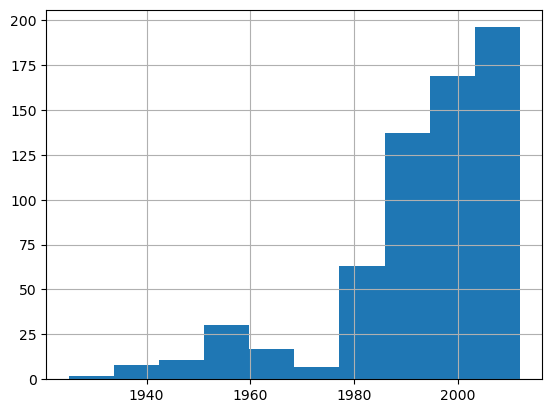

In [163]:
analysis_df[analysis_df['movie_genre']=='comedy film']['movie_release_year'].hist()

In [164]:

p = px.bar(
    num_movies_per_genre_per_year,
    x = 'movie_release_year',
    y = 'num_movies',
    animation_frame='movie_genre',
    range_y=[1, 30],
    log_y=True,
    color='movie_genre',
)
p.show()

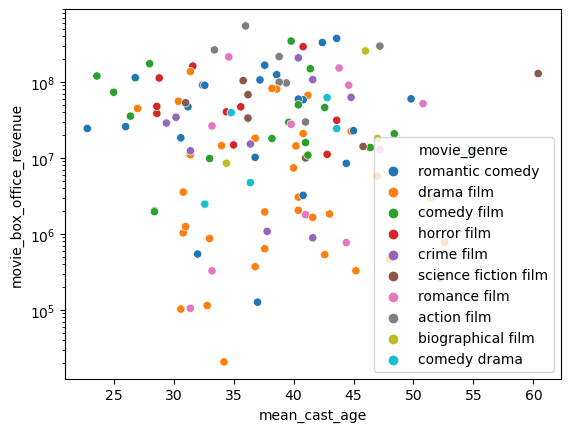

In [165]:
sns.scatterplot(data=analysis_df.query('movie_release_year==2000'), x='mean_cast_age', y='movie_box_office_revenue', hue='movie_genre')
plt.yscale('log')

<AxesSubplot:xlabel='mean_cast_age', ylabel='Count'>

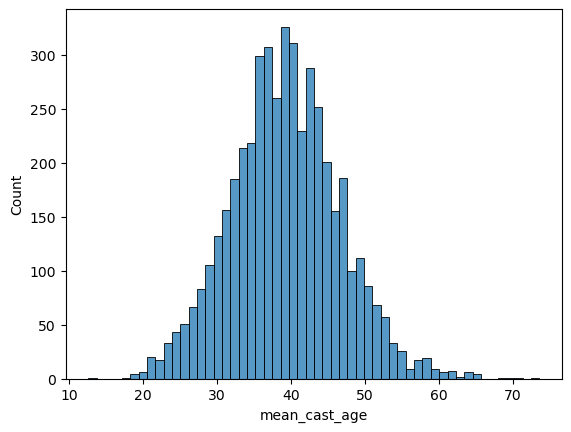

In [166]:
sns.histplot(data=analysis_df, x='mean_cast_age' ,multiple='stack')

<AxesSubplot:xlabel='movie_release_year', ylabel='Count'>

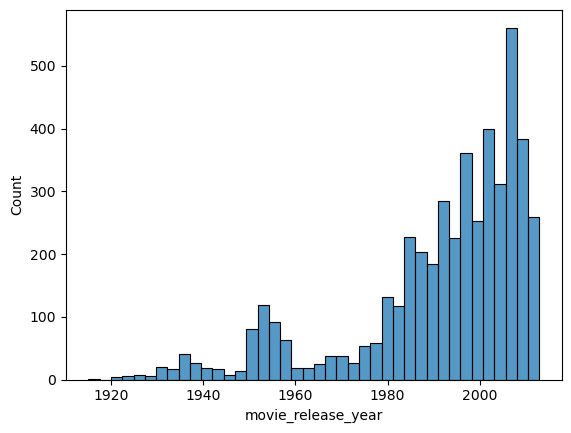

In [167]:
sns.histplot(data=analysis_df, x='movie_release_year')

In [168]:
analysis_df

,movie_id,cast_0_age_at_release,cast_1_age_at_release,cast_2_age_at_release,cast_3_age_at_release,cast_4_age_at_release,movie_release,movie_genre,Freebase Movie ID,movie_release_year,num_movies_in_this_genre,mean_cast_age,diff_cast_age,movie_box_office_revenue,cpi,multiplier,movie_box_office_revenue_adj
0,Q220394,22.0,21.0,24.0,37.0,43.0,1915-01-01,drama film,/m/0151l,1915,1068,29.4,22.0,50000000.0,10.108333,29.455613,1.472781e+09
1,Q1187189,27.0,25.0,35.0,58.0,60.0,1920-01-01,romance film,/m/0c5ppr,1920,289,41.0,35.0,4500000.0,20.041667,14.864445,6.689000e+07
2,Q374172,26.0,7.0,32.0,53.0,13.0,1921-01-01,comedy drama,/m/04vl27,1921,267,26.2,46.0,2500000.0,17.850000,16.690249,4.172562e+07
3,Q2408008,29.0,51.0,43.0,13.0,33.0,1921-01-01,drama film,/m/05b_29y,1921,1068,33.8,38.0,900000.0,17.850000,16.690249,1.502122e+07
4,Q1219825,55.0,30.0,26.0,36.0,22.0,1921-01-01,romance film,/m/06pkq3,1921,289,33.8,33.0,4500000.0,17.850000,16.690249,7.510612e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4709,Q634810,36.0,39.0,30.0,56.0,40.0,2012-08-03,action film,/m/0gvrws1,2012,571,40.2,26.0,178454768.0,229.593917,1.296727,2.314070e+08
4710,Q28936,56.0,52.0,46.0,63.0,52.0,2012-11-15,science fiction film,/m/0gh65c5,2012,200,53.8,17.0,12161038.0,229.593917,1.296727,1.576954e+07
4711,Q32535,46.0,45.0,47.0,34.0,26.0,2012-09-27,comedy drama,/m/0gwgn1k,2012,267,39.6,21.0,56717974.0,229.593917,1.296727,7.354770e+07
4712,Q283586,38.0,45.0,38.0,45.0,31.0,2012-09-11,drama film,/m/0gvt53w,2012,1068,39.4,14.0,15219000.0,229.593917,1.296727,1.973488e+07


In [169]:
model = smf.ols(formula='movie_box_office_revenue ~ diff_cast_age : mean_cast_age : movie_release_year : C(movie_genre)', data=analysis_df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     movie_box_office_revenue   R-squared:                       0.070
Model:                                  OLS   Adj. R-squared:                  0.068
Method:                       Least Squares   F-statistic:                     35.18
Date:                      Wed, 21 Dec 2022   Prob (F-statistic):           6.52e-67
Time:                              12:44:51   Log-Likelihood:                -93502.
No. Observations:                      4714   AIC:                         1.870e+05
Df Residuals:                          4703   BIC:                         1.871e+05
Df Model:                                10                                         
Covariance Type:                  nonrobust                                         
=======================================================================================================================================================
                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                            4.487e+07   3.14e+06     14.275      0.000    3.87e+07     5.1e+07
diff_cast_age:mean_cast_age:movie_release_year:C(movie_genre)[action film]             23.3271      2.076     11.236      0.000      19.257      27.397
diff_cast_age:mean_cast_age:movie_release_year:C(movie_genre)[biographical film]       -3.9183      2.648     -1.480      0.139      -9.110       1.274
diff_cast_age:mean_cast_age:movie_release_year:C(movie_genre)[comedy drama]            -6.3621      2.342     -2.716      0.007     -10.954      -1.770
diff_cast_age:mean_cast_age:movie_release_year:C(movie_genre)[comedy film]             -0.1765      1.784     -0.099      0.921      -3.673       3.320
diff_cast_age:mean_cast_age:movie_release_year:C(movie_genre)[crime film]              -1.6124      2.576     -0.626      0.531      -6.663       3.438
diff_cast_age:mean_cast_age:movie_release_year:C(movie_genre)[drama film]              -7.4991      1.505     -4.983      0.000     -10.450      -4.548
diff_cast_age:mean_cast_age:movie_release_year:C(movie_genre)[horror film]             -0.2527      2.260     -0.112      0.911      -4.683       4.178
diff_cast_age:mean_cast_age:movie_release_year:C(movie_genre)[romance film]            -2.0290      2.474     -0.820      0.412      -6.879       2.821
diff_cast_age:mean_cast_age:movie_release_year:C(movie_genre)[romantic comedy]          0.5568      1.801      0.309      0.757      -2.973       4.087
diff_cast_age:mean_cast_age:movie_release_year:C(movie_genre)[science fiction film]    27.6587      2.812      9.837      0.000      22.147      33.171
==============================================================================
Omnibus:                     6495.752   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3650036.194
Skew:                           7.612   Prob(JB):                         0.00
Kurtosis:                     138.467   Cond. No.                     2.84e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [170]:
# if the age in different gender of actor is different
valid_characters = raw_characters.dropna()
valid_characters = valid_characters[valid_characters['Actor age at movie release'] > 0]

In [171]:
print('original shape:', raw_characters.shape)
print('filtered shape:', valid_characters.shape)

original shape: (45239, 13)
filtered shape: (45239, 13)


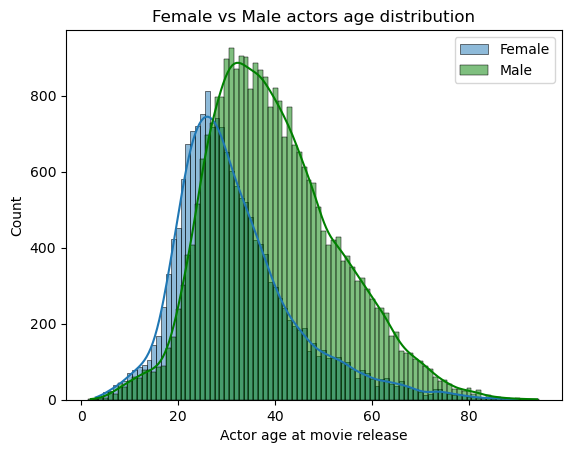

In [172]:
female_actors = valid_characters[valid_characters['Actor gender'] == 'F']
sns.histplot(female_actors['Actor age at movie release'], kde=True, discrete=True, label='Female')
male_actors = valid_characters[valid_characters['Actor gender'] == 'M']
sns.histplot(male_actors['Actor age at movie release'], kde=True, discrete=True, color='green', label='Male')
plt.title('Female vs Male actors age distribution')
plt.legend()


## Analysis on if age diversity of actors impact the financial success of a movie?

To answer this question, we will compute an diversity index (could be similar to MediaVersity) which consists of a combination of different features such as e.g. gender, age, height, ethnicity, etc. Using this new index, we will be able to compare the diversity with the box office revenue to determine if the diversity has an impact on the financial success of a movie by using hypothesis testing.



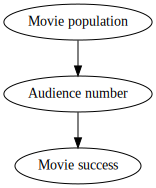

In [144]:
import graphviz as gr
g = gr.Digraph()
g.edge("Audience number", "Movie success")
g.edge('Movie population', 'Audience number')
g

In [ ]:
# group actors by movie and create movie dataframe
movies = []
group_movie = df_analysis.groupby('Wikipedia movie ID')
for id, movie in group_movie:
    if movie.shape[0] < 3:
        continue
    # create new column for number of female actors
    num_female = (movie['Actor gender'] == 'F').sum()
    num_male = (movie['Actor gender'] == 'M').sum()
    new_row = {
        'Movie': movie['Wikipedia movie ID'].iloc[0],
        'Movie release year': movie['Movie release year'].iloc[0],
        'num female': num_female,
        'num male': num_male,
    }
    movies.append(new_row)
df_movies = pd.DataFrame(movies)
    

NameError: name 'df_analysis' is not defined

Analyze movie origin and movie box office revenue

In [ ]:
ext_chars.columns

Index(['movie_id', 'movie_name', 'movie_genre', 'movie_origin',
       'movie_release', 'box_office_value', 'director_id', 'director_name',
       'director_gender', 'director_country', 'director_birth',
       'director_age_at_release', 'producer_id', 'producer_name',
       'producer_gender', 'producer_country', 'producer_birth',
       'producer_age_at_release', 'cast_id_0', 'cast_0_name', 'cast_0_gender',
       'cast_0_country', 'cast_0_birth', 'cast_0_age_at_release', 'cast_id_1',
       'cast_1_name', 'cast_1_gender', 'cast_1_country', 'cast_1_birth',
       'cast_1_age_at_release', 'cast_id_2', 'cast_2_name', 'cast_2_gender',
       'cast_2_country', 'cast_2_birth', 'cast_2_age_at_release', 'cast_id_3',
       'cast_3_name', 'cast_3_gender', 'cast_3_country', 'cast_3_birth',
       'cast_3_age_at_release', 'cast_id_4', 'cast_4_name', 'cast_4_gender',
       'cast_4_country', 'cast_4_birth', 'cast_4_age_at_release'],
      dtype='object')

In [ ]:
study_keys = [
    'movie_id',
    'movie_name',
    'movie_origin',
    'director_country',
    'producer_country',
    'movie_release',
    'movie_genre',
    'box_office_value',
]

In [ ]:
country_study_df = ext_chars[study_keys].copy()
country_study_df = country_study_df.dropna()
country_study_df['movie_release_year'] = pd.to_datetime(country_study_df['movie_release']).dt.year

top = 10
# keep top 10 genres
country_study_df = country_study_df[country_study_df['movie_genre'].isin(country_study_df['movie_genre'].value_counts().index[:top])]

In [ ]:
ext_chars['movie_origin'].value_counts()

United States of America                       32004
India                                           8819
United Kingdom                                  6723
France                                          3634
Japan                                           2536
                                               ...  
United Kingdom of Great Britain and Ireland        1
Greenland                                          1
First Czechoslovak Republic                        1
Suriname                                           1
Honduras                                           1
Name: movie_origin, Length: 174, dtype: int64

In [ ]:
country_study_df['movie_origin']

88                 United Kingdom
91                 United Kingdom
93                 United Kingdom
98                 United Kingdom
103      United States of America
                   ...           
75106              United Kingdom
75147    United States of America
75149                       Italy
75166    United States of America
75192    United States of America
Name: movie_origin, Length: 1278, dtype: object

In [ ]:
p = px.histogram(
    country_study_df,
    x='movie_genre',
    range_y=[1, 1000],
    log_y=True,
    animation_frame='movie_origin',
    
)
p.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0.5,
        dtick = 0.75
    )
)
p.show()